# SMS Spam Classification Using Naive Bayes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing dataset

In [2]:
df = pd.read_csv('spam.csv', encoding = 'latin1')
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


## Preprocessing

### Removing unwanted columns

In [3]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1,inplace=True)

### Renaming v1 & v2

In [4]:
df = df.rename(columns={"v1":"label","v2":"sms"})

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


### creating a column length

In [6]:
df['length'] = df['sms'].apply(len)
df.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Training and Testing

### Creating training and test dataset

In [7]:
x = df['sms']
y = df['label']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)
print(x_train)

872                       I'll text you when I drop x off
831     Hi mate its RV did u hav a nice hol just a mes...
1273    network operator. The service is free. For T &...
3314    FREE MESSAGE Activate your 500 FREE Text Messa...
4929    Hi, the SEXYCHAT girls are waiting for you to ...
                              ...                        
4931                Match started.india  &lt;#&gt;  for 2
3264    44 7732584351, Do you want a New Nokia 3510i c...
1653    I was at bugis juz now wat... But now i'm walk...
2607    :-) yeah! Lol. Luckily i didn't have a starrin...
2732    How dare you stupid. I wont tell anything to y...
Name: sms, Length: 4179, dtype: object


### CountVectorizer()

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

### Fit & Transform

In [15]:
train_data = count_vector.fit_transform(x_train)
test_data = count_vector.transform(x_test)

## Implementing Naive Bayes

In [11]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(train_data, y_train)

MultinomialNB()

In [13]:
print(test_data)

  (0, 442)	1
  (0, 3277)	1
  (0, 2042)	1
  (0, 2798)	1
  (0, 3718)	1
  (0, 964)	1
  (0, 3842)	1
  (0, 2130)	1
  (0, 3736)	1
  (1, 3957)	1
  (1, 3645)	1
  (1, 1445)	1
  (1, 2661)	1
  (2, 3718)	2
  (2, 3645)	1
  (2, 3227)	1
  (2, 2498)	1
  (2, 3185)	1
  (2, 3391)	1
  (2, 485)	1
  (2, 1722)	1
  (2, 1202)	2
  (2, 3198)	1
  (2, 522)	1
  (2, 1535)	1
  :	:
  (1392, 3718)	4
  (1392, 3645)	1
  (1392, 4140)	1
  (1392, 534)	1
  (1392, 1630)	1
  (1392, 3797)	1
  (1392, 4142)	1
  (1392, 1982)	1
  (1392, 2473)	1
  (1392, 142)	1
  (1392, 2569)	1
  (1392, 919)	1
  (1392, 548)	1
  (1392, 2635)	1
  (1392, 722)	1
  (1392, 3211)	1
  (1392, 3012)	1
  (1392, 4069)	1
  (1392, 1225)	1
  (1392, 3300)	1
  (1392, 1133)	1
  (1392, 3509)	1
  (1392, 344)	1
  (1392, 1405)	1
  (1392, 203)	1


### Prediting the test set result

In [16]:
y_pred = classifier.predict(test_data)
print(y_pred)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'spam']


### Making confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1193    3]
 [  16  181]]


### Displaying CM

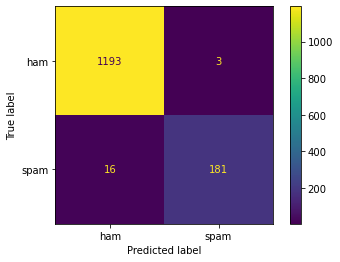

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=classifier.classes_)
disp.plot()

### Accuracy calculation

In [20]:
training_score = classifier.score(train_data, y_train)
test_score = classifier.score(test_data, y_test)
print(training_score)
print(test_score)

0.9928212491026561
0.9863603732950467


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {}'.format(precision_score(y_test, y_pred,pos_label="spam")))
print('Recall score: {}'.format(recall_score(y_test, y_pred,pos_label="spam")))
print('F1 score: {}'.format(f1_score(y_test, y_pred,pos_label="spam")))

Accuracy score: 0.9863603732950467
Precision score: 0.9836956521739131
Recall score: 0.9187817258883249
F1 score: 0.9501312335958005


## Word Cloud Representation

In [22]:
!pip install wordcloud
from wordcloud import WordCloud

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 458 kB 2.5 MB/s eta 0:00:01     |█████                           | 71 kB 2.5 MB/s eta 0:00:01


### Get the spam & ham messages


In [24]:
spam = df[df['label']=='spam']['sms'].str.cat(sep=', ')
ham = df[df['label']=='ham']['sms'].str.cat(sep=', ')

### Initialize the word cloud


In [25]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color ='white')

### Generate the world clouds for each type of message

In [26]:
spam_wc = wc.generate(spam)

### plot the world cloud for spam

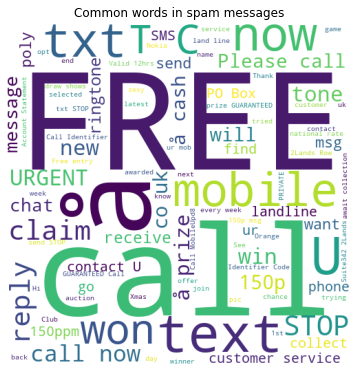

In [27]:
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(spam_wc)
plt.axis("off")
plt.title("Common words in spam messages")
plt.tight_layout(pad = 0)
plt.show()

### plot the world cloud for ham

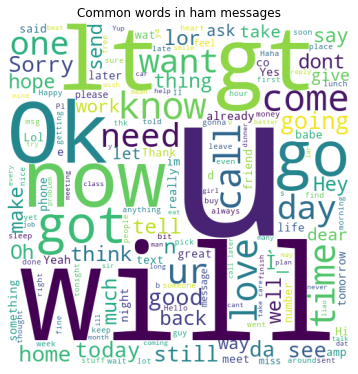

In [29]:
ham_wc = wc.generate(ham)
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(ham_wc)

plt.axis("off")
plt.title("Common words in ham messages")
plt.tight_layout(pad = 0)
plt.show()